# Import Libraries

In [1230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1231]:
pd_options = {
'display.max_rows'    : 500,
'display.max_columns' : 500,
'display.width'       : 1000,
}

[pd.set_option(option, setting) for option, setting in pd_options.items()]

[None, None, None]

In [1232]:
# show non scientific numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import dataset

In [1233]:
df = pd.read_csv('loan.csv')

/var/folders/l0/y2ztlhpd3ksgsvm97s01txpm0000gn/T/ipykernel_4567/129683778.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


# Part I: Data Cleaning

## 1. Examining the dataset

The datset looks like below:

In [1234]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,NaN,May-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0,Feb-96,1,35.000,NaN,10,0,5598,21%,37,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,NaN,Apr-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

The dataset has 39,717 rows and 111 columns. And there are 3 data types: Float, Integer and Object

In [1235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Primary columns of the dataset is 'id': A unique LC assigned ID for the loan listing 
and 'member_id': A unique LC assigned Id for the borrower member.


In [1236]:
df['id'].nunique()

39717

In [1237]:
df['member_id'].nunique()

39717

So that, there are 39717 loans in the dataset and each loan comes with an unique borrower.

## 2. Data Cleaning

### 2.1. Missing values (part 1)

Let's check how many missing values are in the dataset

In [1238]:
df.isnull().sum().sort_values(ascending = 0)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


There are 54 columns only contains null values

In [1239]:
sum(((df.isnull().sum().sort_values(ascending = 0) / len(df) )*100) == 100)

54

Since there are no meaning to those columns, we will drop all-null columns out of the dataset for now.

In [1240]:
df = df.dropna(axis = 1, how = 'all')
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'], dtype='object')

So, after dropping all null columns, the dataset has 39717 rows and 57 columns.

In [1241]:
df.shape

(39717, 57)

In [1242]:
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

There are 3 types of data in dataset: float64, int64 and object. Let's dive deep into each datatype!

In [1243]:
df.select_dtypes('object').columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type'], dtype='object')

In [1244]:
df.select_dtypes('float64').columns

Index(['funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'], dtype='object')

In [1245]:
df.select_dtypes('int64').columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'policy_code', 'acc_now_delinq', 'delinq_amnt'], dtype='object')

### 2.2 Filtering Data (part 1)

*The aim of this analysis is to to identify patterns which indicate if a person is likely to default.*

There are some columns that is not meaningful when come our aim, so that there is a need of dropping those columns

In [1246]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'], dtype='object')

Column 
+ 'url': URL for the LC page with listing data 
+ 'desc': Loan description provided by the borrower 
+ 'emp_title': The job title supplied by the Borrower when applying for the loan 
+ 'zip_code': The first 3 numbers of the zip code provided by the borrower in the loan application
+ 'title': The loan title provided by the borrower 


 will be dropped. 




In [1247]:
df = df.drop(columns = ['url', 'desc', 'zip_code', 'title'])

Next, we will examine duplicated records. If there are any duplicated records, it will add in bias over some specific set of values which is not beneficial when applying machine learning models.

In [1248]:
len(df)-len(df.drop_duplicates())

0

There are no duplicate records in the dataset.

### 2.4 Invalid Values (part 1)

In column 'int_rate' and 'revol_util', there are an unnecessary symbol '%'. So we need to take the symbol out.

In [1249]:
df['int_rate'] = df['int_rate'].str.replace('%','')
df['int_rate'] = df['int_rate'].astype('float64')

In [1250]:
df['revol_util'] = df['revol_util'].str.replace('%','')
df['revol_util'] = df['revol_util'].astype('float64')

Column 'term' has some leading space in values, so that there is a need of trimming leading space in 'term' column values.

In [1251]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [1252]:
df['term'] = df['term'].str.lstrip()
df['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [1253]:
df['out_prncp'].unique()

array([   0.  ,  524.06, 1849.1 , ...,   19.12,   13.28,   79.24])

### 2.3 Missing values (part 2)

We will examine the missing values of the dataset. Here is the percentage of null values of each column:

In [1254]:
(df.isnull().sum().sort_values(ascending = 0) / len(df) )*100

next_pymnt_d                 97.130
mths_since_last_record       92.985
mths_since_last_delinq       64.662
emp_title                     6.191
emp_length                    2.707
pub_rec_bankruptcies          1.755
last_pymnt_d                  0.179
chargeoff_within_12_mths      0.141
collections_12_mths_ex_med    0.141
revol_util                    0.126
tax_liens                     0.098
last_credit_pull_d            0.005
total_pymnt_inv               0.000
initial_list_status           0.000
delinq_amnt                   0.000
acc_now_delinq                0.000
out_prncp                     0.000
out_prncp_inv                 0.000
total_pymnt                   0.000
total_rec_prncp               0.000
policy_code                   0.000
total_rec_int                 0.000
total_rec_late_fee            0.000
recoveries                    0.000
collection_recovery_fee       0.000
application_type              0.000
last_pymnt_amnt               0.000
total_acc                   

Column 
+ 'next_pymnt_d': Next scheduled payment date
+ 'mths_since_last_record': The number of months since the last public record.

will be dropped out because there are more than 90% of values are null values.

In [1255]:
df = df.drop(columns = ['next_pymnt_d','mths_since_last_record'])

In [1256]:
df.isnull().sum().sort_values(ascending = 0)

mths_since_last_delinq        25682
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
revol_util                       50
tax_liens                        39
last_credit_pull_d                2
total_rec_prncp                   0
total_acc                         0
delinq_amnt                       0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
policy_code                       0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
revol_bal                         0
last_pymnt_amnt                   0
acc_now_delinq                    0
application_type                  0
total_rec_int                     0
id                          

For missing values of column 'mths_since_last_delinq', all applicants has null values does not have any 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years and the past-due amount owed for the accounts on which the borrower is now delinquent is zero.



In [1257]:
df[df['mths_since_last_delinq'].isnull() == True]['delinq_2yrs'].unique()

array([0])

So, in business sense, the column 'mths_since_last_delinq' null values means there are no delinquency. But, in data analysis, we need to assign values to all these null values. So that, we will use an different values that could be distinguish by the computer/machine that run the models fromt the normal values of months. We will assign number '-1' for all the missing values.

In [1258]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(-1)
df['mths_since_last_delinq'].unique()

array([ -1.,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0.])

For 1033 missing values of columns 'emp_legth', after examine the column 'emp_title', there are 978 null values in 'emp_title' also. From that, we could assume that all missing values in 'emp_length' is because there are no information about employment. Hence, we will put all missing values of 'emp_length' into group 'non_info' and 'emp_title' to 'No information'.

In [1259]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [1260]:
df[df['emp_length'].isnull() == True]['emp_title'].isnull().sum()

1019

In [1261]:
df['emp_length'] = df['emp_length'].fillna('non_info')
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'non_info'],
      dtype=object)

In [1262]:
df['emp_title'] = df['emp_title'].fillna('No information')
df['emp_title'].value_counts()

No information                     2459
US Army                             134
Bank of America                     109
IBM                                  66
AT&T                                 59
                                   ... 
AMEC                                  1
lee county sheriff                    1
Bacon County Board of Education       1
Hotpads                               1
Evergreen Center                      1
Name: emp_title, Length: 28821, dtype: int64

For 697 missing values of 'pub_rec_bankruptcies' column, we will fill with number '0' represent that there are no bankruptcies records.

In [1263]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)
df['pub_rec_bankruptcies'].value_counts()

0.000    38036
1.000     1674
2.000        7
Name: pub_rec_bankruptcies, dtype: int64

For 71 missing values of 'last_pymnt_d' column, these values means that there are no payment recorded in loan tenor time. So that, we will fill the issue date 

In [1264]:
df[df['last_pymnt_d'].isnull() == True]['last_pymnt_amnt'].value_counts()

0.000    71
Name: last_pymnt_amnt, dtype: int64

In [1265]:
df[df['last_pymnt_d'].isnull() == True]['loan_status'].value_counts()

Charged Off    71
Name: loan_status, dtype: int64

In [1266]:
df['last_pymnt_d'] = df['last_pymnt_d'].fillna(df['issue_d'])

For 50 missing values of column 'revol_util', we will put value zero (0) to indicate that there are no 

In [1267]:
df['revol_util'] = df['revol_util'].fillna(0)

For 2 missing values of column 'last_credit_pull_d', to distinguish that there are no pull request, we will fill na with a very far date of '00-Jan'.

In [1268]:
df['last_credit_pull_d'] = df['last_credit_pull_d'].fillna('01-Jan')

### Final resultes after handling missing values:

In [1269]:
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_li

### 2.5 Filtering Data (part 2)

There are some need to first filtering columns based on business sense. There are 4 types of records in the dataset: _Loan accepted - Fully paid, Loan accepted - Current, loan accepted - Charged off (defaulted)_. So that, the records that does not end (current) is not in scope because those records do not have a clear status of 'default' or 'not-default'. So that, we need to separate those records for now.

In [1270]:
df_current = df[df['loan_status'] == 'Current']
df_current.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
4,1075358,1311748,3000,3000,3000.000,60 months,12.690,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,n,other,OR,17.940,0,Jan-96,0,38.000,15,0,27783,53.900,38,f,524.060,524.060,3513.330,3513.330,2475.940,1037.390,0.000,0.000,0.000,May-16,67.790,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
32,1065420,1299514,10000,10000,9975.000,60 months,15.960,242.970,C,C5,US Legal Support,2 years,RENT,29120.000,Verified,Dec-11,Current,n,debt_consolidation,FL,22.830,0,Feb-97,1,68.000,11,0,16158,63.600,31,f,1849.100,1844.430,12594.240,12562.850,8150.890,4443.350,0.000,0.000,0.000,May-16,242.970,Apr-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
39,1069346,1304237,12500,12500,12475.000,60 months,12.690,282.440,B,B5,United States Infrastructure Corporation,1 year,RENT,27000.000,Verified,Dec-11,Current,n,debt_consolidation,IL,16.040,0,Dec-01,3,-1.000,6,0,10143,50.000,24,f,2181.420,2177.030,14636.300,14607.080,10318.580,4317.720,0.000,0.000,0.000,May-16,282.440,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
86,1063958,1297940,14000,14000,13975.000,60 months,17.270,349.980,D,D3,community colleges of spokane,4 years,RENT,28000.000,Verified,Dec-11,Current,n,other,WA,6.340,0,Jul-05,2,-1.000,5,0,6986,79.400,10,f,2637.340,2632.590,18176.960,18144.590,11362.670,6814.290,0.000,0.000,0.000,May-16,349.980,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
95,1068575,1303001,15300,15300,15275.000,60 months,22.060,423.100,F,F4,OSSI,6 years,RENT,85000.000,Verified,Dec-11,Current,n,credit_card,VA,20.580,0,Feb-84,2,56.000,14,0,26524,89.700,27,f,3125.790,3120.680,21988.200,21952.280,12174.210,9813.990,0.000,0.000,0.000,May-16,423.100,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000


In [1271]:
df = df[df['loan_status'] != 'Current']
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

So that, now our dataframe has 38577 rows and 43 columns

In [1272]:
df.shape

(38577, 51)

### 2.6 Invalid values (part 2)

We examine the number of unqiue values of each columns. There are some columns only have one unique values, so that we will get rid of that

In [1273]:
df.nunique().sort_values()

tax_liens                         1
initial_list_status               1
out_prncp                         1
out_prncp_inv                     1
collections_12_mths_ex_med        1
policy_code                       1
pymnt_plan                        1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
loan_status                       2
term                              2
pub_rec_bankruptcies              3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       12
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq      

In [1274]:
for col in df.columns:
    if df[col].nunique() == 1:
        df = df.drop(col,axis=1)
print(df.nunique().sort_values())

loan_status                    2
term                           2
pub_rec_bankruptcies           3
verification_status            3
home_ownership                 5
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    12
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
mths_since_last_delinq        96
last_pymnt_d                 101
last_credit_pull_d           107
int_rate                     370
earliest_cr_line             524
loan_amnt                    870
funded_amnt                 1019
revol_util                  1088
total_rec_late_fee          1320
collection_recovery_fee     2616
dti                         2853
recoveries                  4040
annual_inc                  5215
total_rec_prncp             6841
funded_amn

### Final dataset dimensions:

In [1275]:
df.shape

(38577, 40)

Lastly, let's examine the correlation between variable in the dataset:

There are two groups of variables that have high correlation: 
+ loan_amnt - funded_amnt - funded_amnt_inv 
+ total_pymnt - total_pymnt_inv - total_rec_prncp - total_rec_int

However, these correlations is true to business sense so that there are no need of dropping these columns.

/var/folders/l0/y2ztlhpd3ksgsvm97s01txpm0000gn/T/ipykernel_4567/2222595352.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

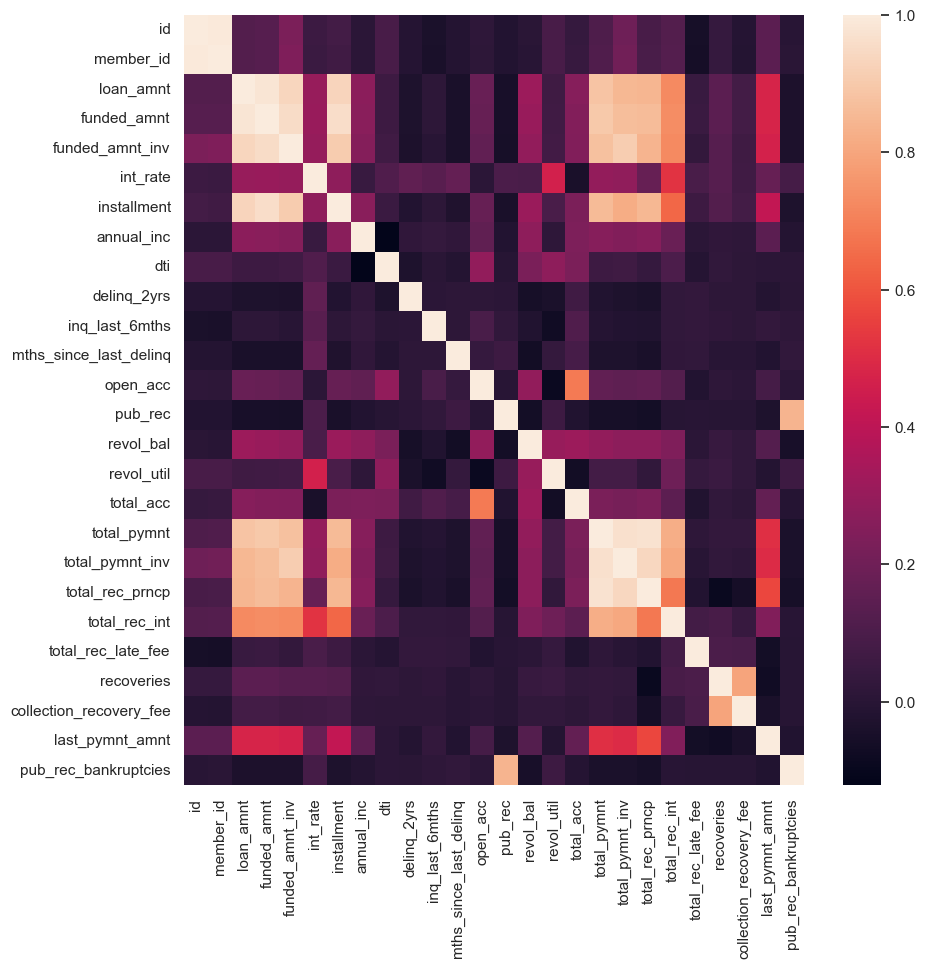

In [1276]:
sns.set(rc = {'figure.figsize' : (10,10)})
sns.heatmap(df.corr())

### 2.7 Standardise values (Outliers Handling)

Let's examine the distribution of each column:

In [1277]:
df = df.set_index(['id', 'member_id'])

In [1278]:
df.describe(percentiles= (0.15, 0.25, 0.5, 0.75, 0.9, 0.95))

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000
mean,11047.025,10784.059,10222.481,11.932,322.466,68777.974,13.273,0.147,0.872,12.071,9.275,0.055,13289.490,48.640,22.053,11866.970,11271.196,9648.323,2119.243,1.369,98.036,12.773,2746.243,0.043
std,7348.442,7090.306,7022.721,3.691,208.639,64218.682,6.673,0.492,1.072,21.982,4.402,0.238,15866.492,28.400,11.426,8809.856,8700.846,7009.381,2389.500,7.316,698.650,150.837,4494.648,0.203
min,500.000,500.000,0.000,5.420,15.690,4000.000,0.000,0.000,0.000,-1.000,2.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
15%,4000.000,4000.000,3600.000,7.510,124.410,34000.000,5.550,0.000,0.000,-1.000,5.000,0.000,1945.000,14.200,10.000,3764.477,3317.422,3000.000,425.036,0.000,0.000,0.000,138.704,0.000
25%,5300.000,5200.000,5000.000,8.940,165.740,40000.000,8.130,0.000,0.000,-1.000,6.000,0.000,3650.000,25.100,13.000,5513.497,5019.590,4500.000,643.990,0.000,0.000,0.000,217.420,0.000
50%,9600.000,9550.000,8733.440,11.710,277.860,58868.000,13.370,0.000,1.000,-1.000,9.000,0.000,8762.000,49.000,20.000,9674.048,9066.660,8000.000,1300.450,0.000,0.000,0.000,568.260,0.000
75%,15000.000,15000.000,14000.000,14.380,425.550,82000.000,18.560,0.000,1.000,21.000,12.000,0.000,16912.000,72.200,29.000,16136.952,15329.780,13175.000,2671.980,0.000,0.000,0.000,3447.250,0.000
90%,21600.000,20000.000,19975.000,16.820,620.900,115000.000,22.290,1.000,2.000,49.000,15.000,0.000,28972.000,87.800,38.000,24144.089,23375.242,20000.000,4889.208,0.000,16.204,0.000,8516.180,0.000
95%,25000.000,25000.000,24500.067,18.312,760.820,140004.000,23.800,1.000,3.000,64.000,17.000,1.000,41356.200,93.500,43.000,29620.756,28989.590,24280.000,6862.398,14.930,381.768,5.420,12370.088,0.000


For 'recoveries' and 'collection_recovery_fee' column, there are big difference between min value, 95 percentile and max value. But the frequency of each big values is not small enough to consider outliers. 

### Final dataset after performing Data cleaning

In [1279]:
df.head()

,,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
id,member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,No information,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.650,0,Jan-85,1,-1.000,3,0,13648,83.700,9,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,May-16,0.000
1077430,1314167,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,GA,1.000,0,Apr-99,5,-1.000,3,0,1687,9.400,4,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,Sep-13,0.000
1077175,1313524,2400,2400,2400.000,36 months,15.960,84.330,C,C5,No information,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,small_business,IL,8.720,0,Nov-01,2,-1.000,2,0,2956,98.500,10,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,May-16,0.000
1076863,1277178,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,other,CA,20.000,0,Feb-96,1,35.000,10,0,5598,21.000,37,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,Apr-16,0.000
1075269,1311441,5000,5000,5000.000,36 months,7.900,156.460,A,A4,Veolia Transportaton,3 years,RENT,36000.000,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.200,0,Nov-04,3,-1.000,9,0,7963,28.300,12,5632.210,5632.210,5000.000,632.210,0.000,0.000,0.000,Jan-15,161.030,Jan-16,0.000


In [1280]:
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
mths_since_last_delinq     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d  

In [1281]:
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
mths_since_last_delinq     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d  

# Part II: Exploratory Data Analysis

## 1. Univariate Analysis and Segmented Univariate Analysis

### 1.1 Categorical variables

Here is the dataset after performing Data Cleaning:

In [1282]:
df.head()

,,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
id,member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,No information,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.650,0,Jan-85,1,-1.000,3,0,13648,83.700,9,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,May-16,0.000
1077430,1314167,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,GA,1.000,0,Apr-99,5,-1.000,3,0,1687,9.400,4,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,Sep-13,0.000
1077175,1313524,2400,2400,2400.000,36 months,15.960,84.330,C,C5,No information,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,small_business,IL,8.720,0,Nov-01,2,-1.000,2,0,2956,98.500,10,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,May-16,0.000
1076863,1277178,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,other,CA,20.000,0,Feb-96,1,35.000,10,0,5598,21.000,37,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,Apr-16,0.000
1075269,1311441,5000,5000,5000.000,36 months,7.900,156.460,A,A4,Veolia Transportaton,3 years,RENT,36000.000,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.200,0,Nov-04,3,-1.000,9,0,7963,28.300,12,5632.210,5632.210,5000.000,632.210,0.000,0.000,0.000,Jan-15,161.030,Jan-16,0.000


First, examine the loan_status, the label column of the dataset:

<Axes: title={'center': 'Loan Status'}>

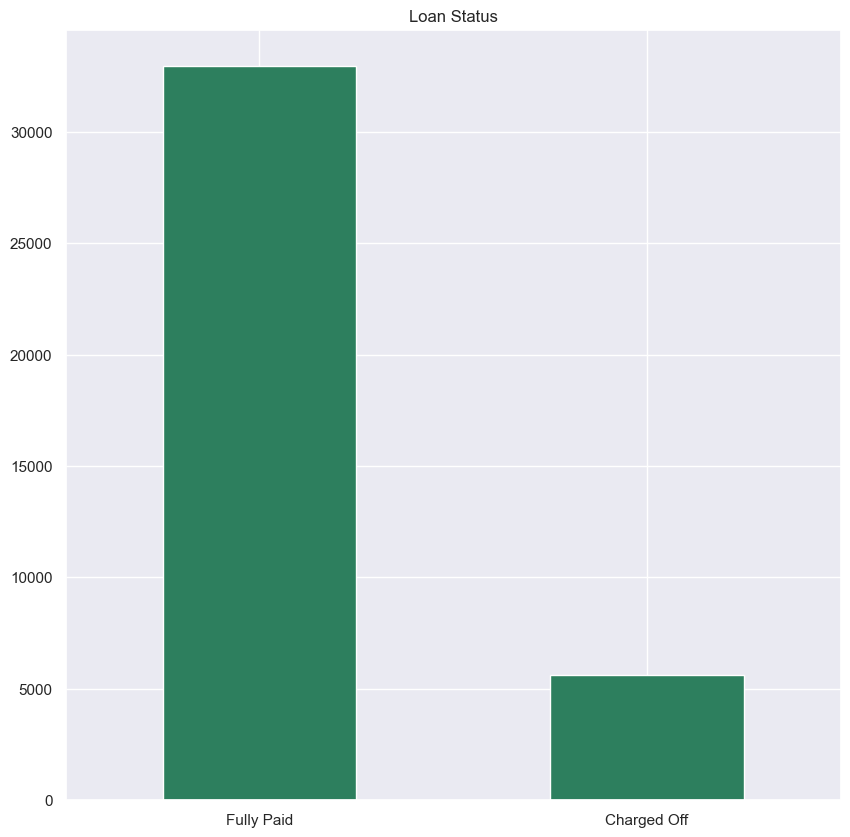

In [1283]:
df['loan_status'].value_counts().plot(kind='bar',color='#2d7f5e', edgecolor='white', rot=0, title = 'Loan Status')

#### Term

There are 14.5% of the loan records are defaulted, which is a moderate case of imbalanced dataset (mild: 20%-40%, moderate: 1%-20%, extreme: <1%)

In [1284]:
(df['loan_status'].value_counts() / len(df))*100

Fully Paid    85.414
Charged Off   14.586
Name: loan_status, dtype: float64

Next is column 'term', the proportion of default loan is higher in shorter term (36 months)

<Axes: xlabel='term', ylabel='count'>

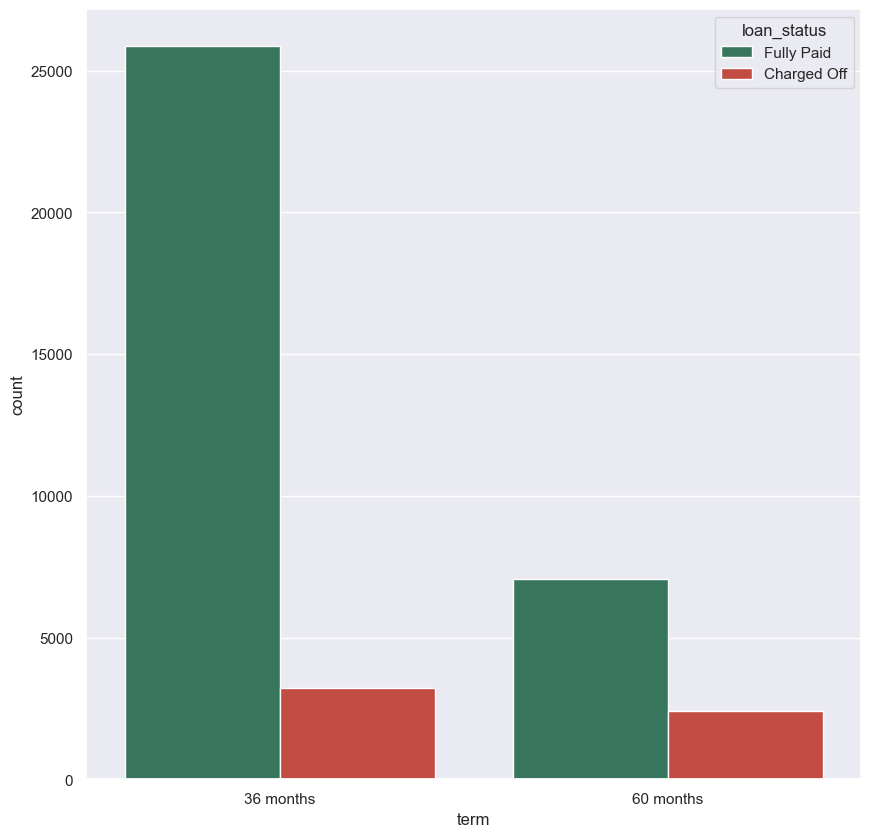

In [1285]:
sns.countplot(data=df, x='term', hue='loan_status', palette=['#2d7f5e', '#D83A2D'])

#### Interest Rates
Examining the 'int_rate' column, the defaulted loans tend to have higher interest rate than non-defaulted loans.

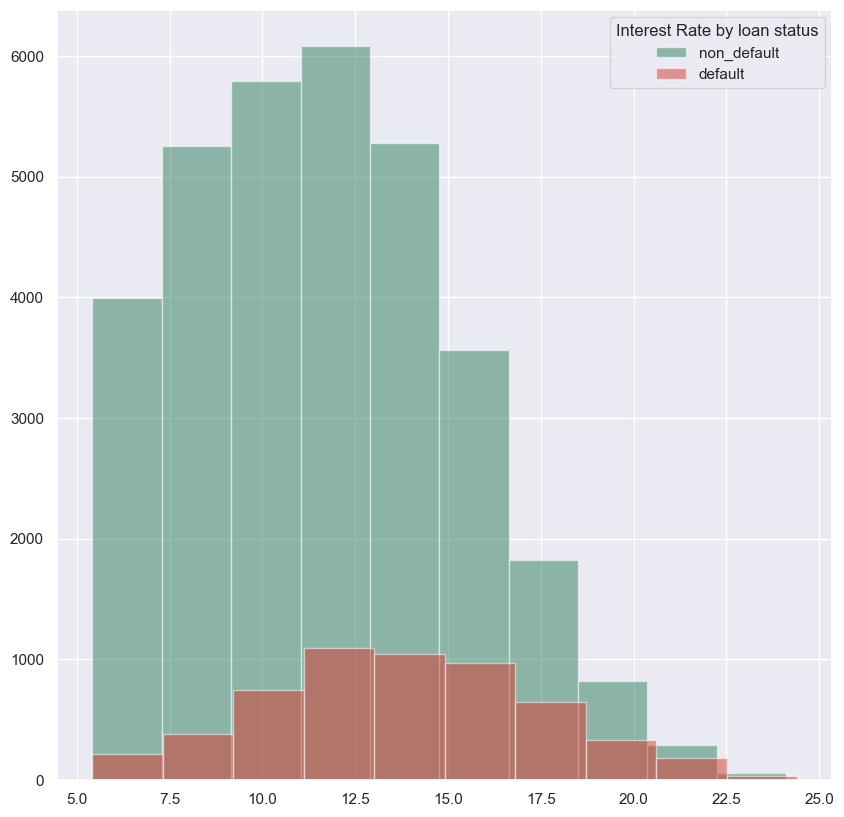

In [1286]:
#define int_rate values by loan_status group
default = df.loc[df['loan_status'] == 'Charged Off', 'int_rate']
non_default = df.loc[df['loan_status'] == 'Fully Paid', 'int_rate']

#add two histograms to one plot
plt.hist(non_default, alpha=0.5, label='non_default', color = '#2d7f5e')
plt.hist(default, alpha=0.5, label='default', color = '#D83A2D')


plt.legend(title='Interest Rate by loan status')
plt.show()

#### Grade
For column 'grade', better grade has better percentage of non-default loans.

<Axes: xlabel='grade', ylabel='count'>

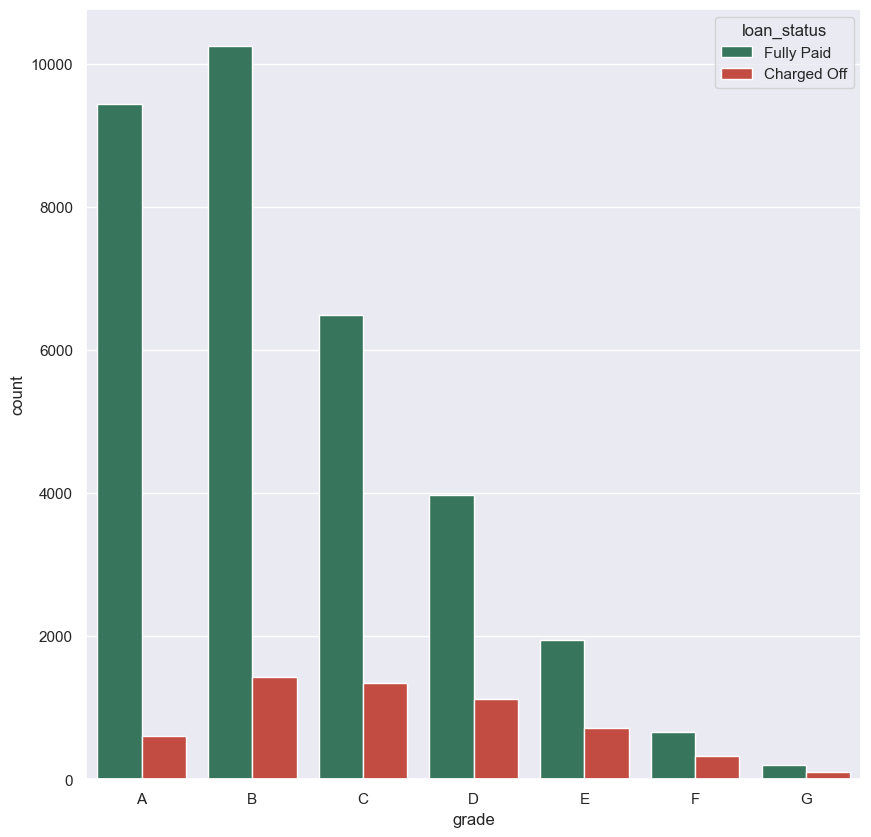

In [1287]:

sns.countplot(data=df, x='grade', hue='loan_status', palette=['#2d7f5e', '#D83A2D'], order = ['A', 'B', 'C', 'D', 'E', 'F','G'])

#### Home Ownership
For 'home_ownership', borrowers have *Mortgage* and *Rent* type of home is the type that has the highest number of defaulted loan.

<Axes: xlabel='home_ownership', ylabel='count'>

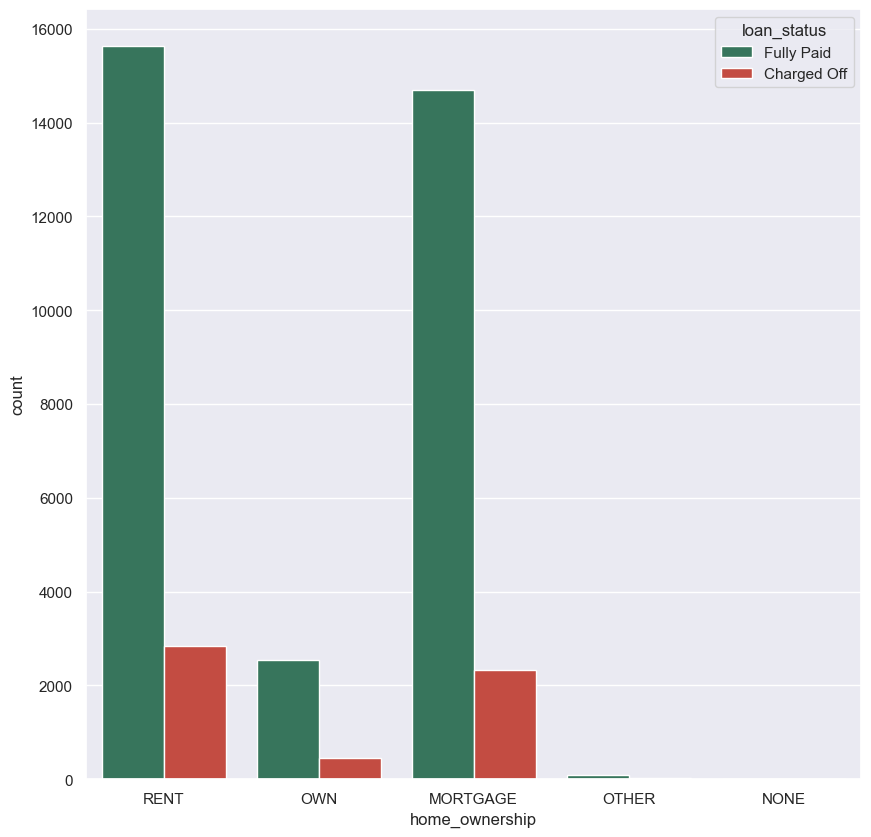

In [1288]:
sns.countplot(data=df, x='home_ownership', hue='loan_status', palette=['#2d7f5e', '#D83A2D'])

#### Purpose of loan
Examining the column 'purpose', *debt consolidation* and *small business* has the highes proportion of defaulted loan.

<Axes: xlabel='count', ylabel='purpose'>

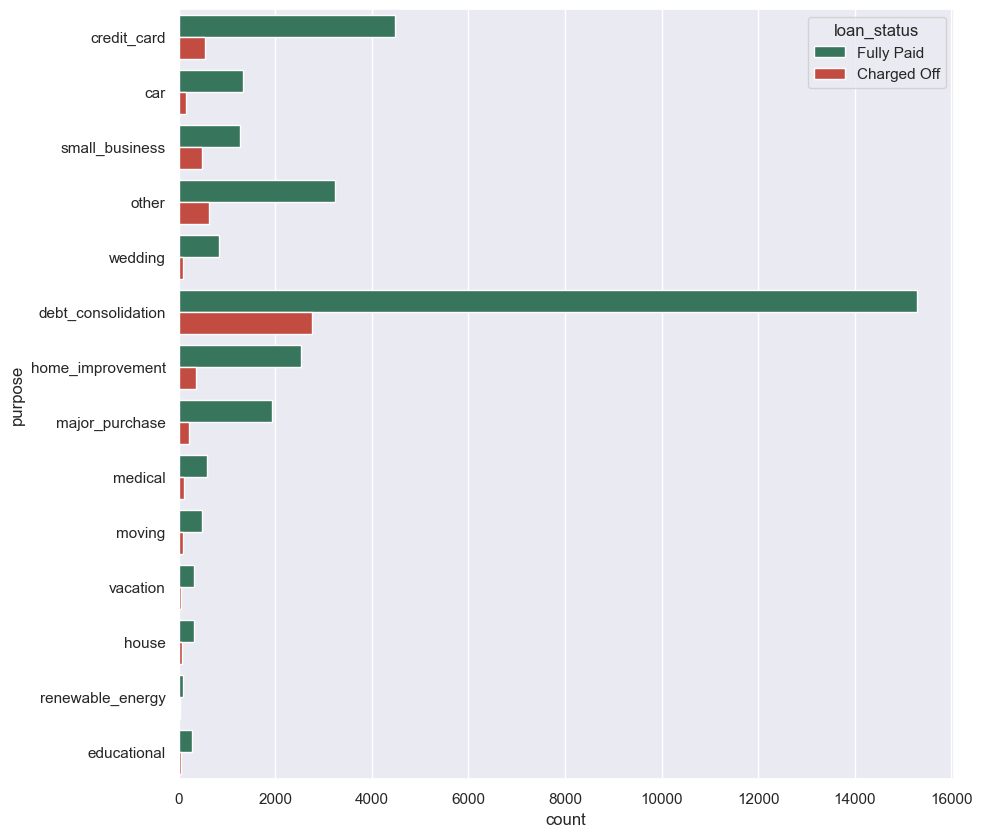

In [1289]:
sns.countplot(data=df, y='purpose', hue='loan_status', palette=['#2d7f5e', '#D83A2D'])

#### Employee length
For 'emp_length' column, applicants that have no information of employment has the highest rate of defaulted loans; up next is >10 years and 7 years of employment.

<Axes: xlabel='count', ylabel='emp_length'>

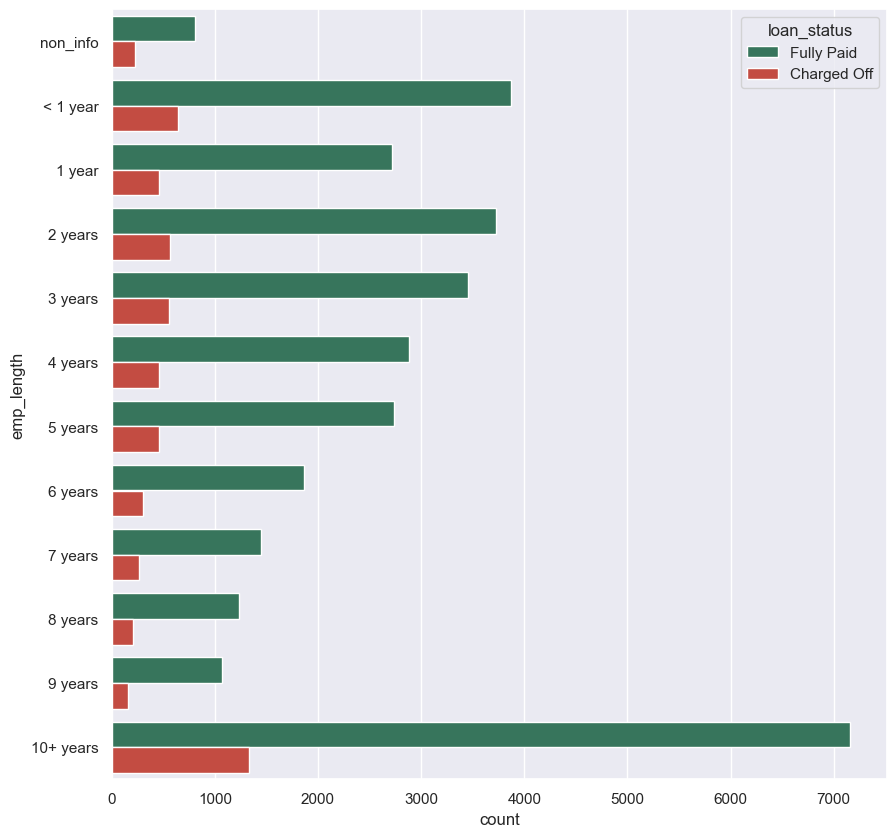

In [1290]:
sns.countplot(data=df, y='emp_length', hue='loan_status', palette=['#2d7f5e', '#D83A2D'], 
              order = ['non_info', '< 1 year', '1 year' , '2 years', '3 years', '4 years', '5 years'
                       , '6 years', '7 years', '8 years', '9 years', '10+ years'])

In [1291]:
df.groupby('emp_length')['loan_status'].value_counts(normalize = True).sort_values()

emp_length  loan_status
9 years     Charged Off   0.129
2 years     Charged Off   0.132
4 years     Charged Off   0.138
3 years     Charged Off   0.138
8 years     Charged Off   0.141
6 years     Charged Off   0.142
< 1 year    Charged Off   0.142
5 years     Charged Off   0.143
1 year      Charged Off   0.144
7 years     Charged Off   0.154
10+ years   Charged Off   0.157
non_info    Charged Off   0.221
            Fully Paid    0.779
10+ years   Fully Paid    0.843
7 years     Fully Paid    0.846
1 year      Fully Paid    0.856
5 years     Fully Paid    0.857
< 1 year    Fully Paid    0.858
6 years     Fully Paid    0.858
8 years     Fully Paid    0.859
3 years     Fully Paid    0.862
4 years     Fully Paid    0.862
2 years     Fully Paid    0.868
9 years     Fully Paid    0.871
Name: loan_status, dtype: float64

#### Annual Income
Next, we will examine the 'annual_inc' column. The defaulted loans has less annual income than non-defaulted loan.

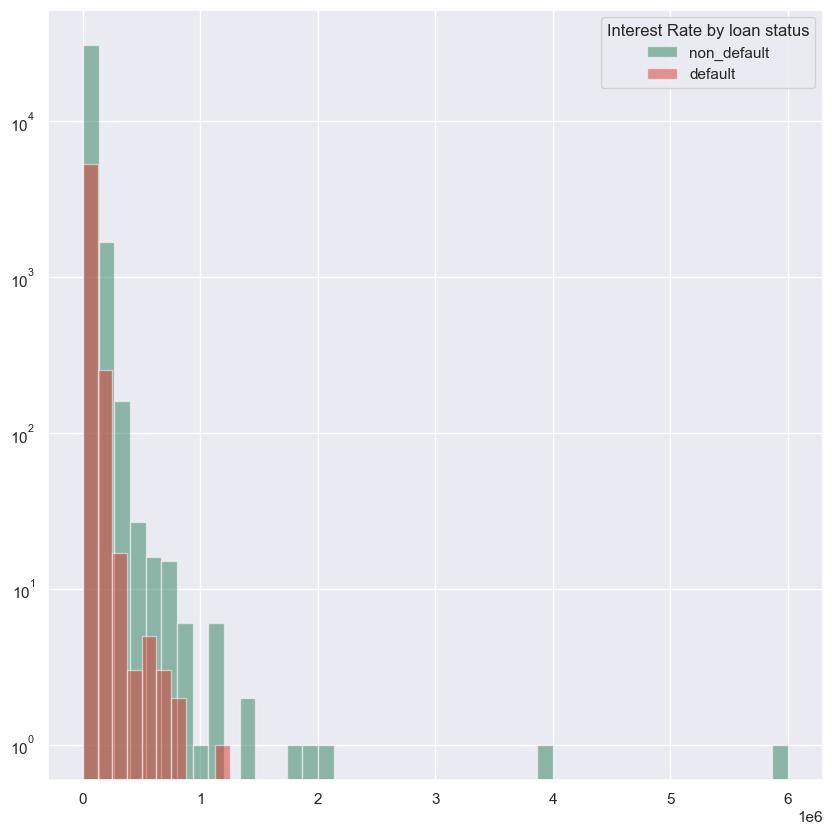

In [1292]:
# log scale of 'annual_inc'
#define int_rate values by loan_status group
default = df.loc[df['loan_status'] == 'Charged Off', 'annual_inc']
non_default = df.loc[df['loan_status'] == 'Fully Paid', 'annual_inc']

#add two histograms to one plot
plt.hist(non_default, bins = 45, alpha=0.5, label='non_default', color = '#2d7f5e', log = True)
plt.hist(default, bins = 10, alpha=0.5, label='default', color = '#D83A2D', log = True)


plt.legend(title='Interest Rate by loan status')
plt.show()


# plt.hist(data = df, x = 'annual_inc', label = 'loan_status', log = True)

### 1.2 Numeric variables

Let's look into the quantiative summary of each numeric column:

In [1293]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000
mean,11047.025,10784.059,10222.481,11.932,322.466,68777.974,13.273,0.147,0.872,12.071,9.275,0.055,13289.490,48.640,22.053,11866.970,11271.196,9648.323,2119.243,1.369,98.036,12.773,2746.243,0.043
std,7348.442,7090.306,7022.721,3.691,208.639,64218.682,6.673,0.492,1.072,21.982,4.402,0.238,15866.492,28.400,11.426,8809.856,8700.846,7009.381,2389.500,7.316,698.650,150.837,4494.648,0.203
min,500.000,500.000,0.000,5.420,15.690,4000.000,0.000,0.000,0.000,-1.000,2.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5300.000,5200.000,5000.000,8.940,165.740,40000.000,8.130,0.000,0.000,-1.000,6.000,0.000,3650.000,25.100,13.000,5513.497,5019.590,4500.000,643.990,0.000,0.000,0.000,217.420,0.000
50%,9600.000,9550.000,8733.440,11.710,277.860,58868.000,13.370,0.000,1.000,-1.000,9.000,0.000,8762.000,49.000,20.000,9674.048,9066.660,8000.000,1300.450,0.000,0.000,0.000,568.260,0.000
75%,15000.000,15000.000,14000.000,14.380,425.550,82000.000,18.560,0.000,1.000,21.000,12.000,0.000,16912.000,72.200,29.000,16136.952,15329.780,13175.000,2671.980,0.000,0.000,0.000,3447.250,0.000
max,35000.000,35000.000,35000.000,24.400,1305.190,6000000.000,29.990,11.000,8.000,120.000,44.000,4.000,149588.000,99.900,90.000,58563.680,58563.680,35000.020,23563.680,180.200,29623.350,7002.190,36115.200,2.000


array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'funded_amnt'}>,
        <Axes: title={'center': 'funded_amnt_inv'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'installment'}>],
       [<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'delinq_2yrs'}>,
        <Axes: title={'center': 'inq_last_6mths'}>,
        <Axes: title={'center': 'mths_since_last_delinq'}>],
       [<Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'total_acc'}>],
       [<Axes: title={'center': 'total_pymnt'}>,
        <Axes: title={'center': 'total_pymnt_inv'}>,
        <Axes: title={'center': 'total_rec_prncp'}>,
        <Axes: title={'center': 'total_rec_int'}>,
        <Axes: title={'center': 'total_rec_late_fee'}>],
       

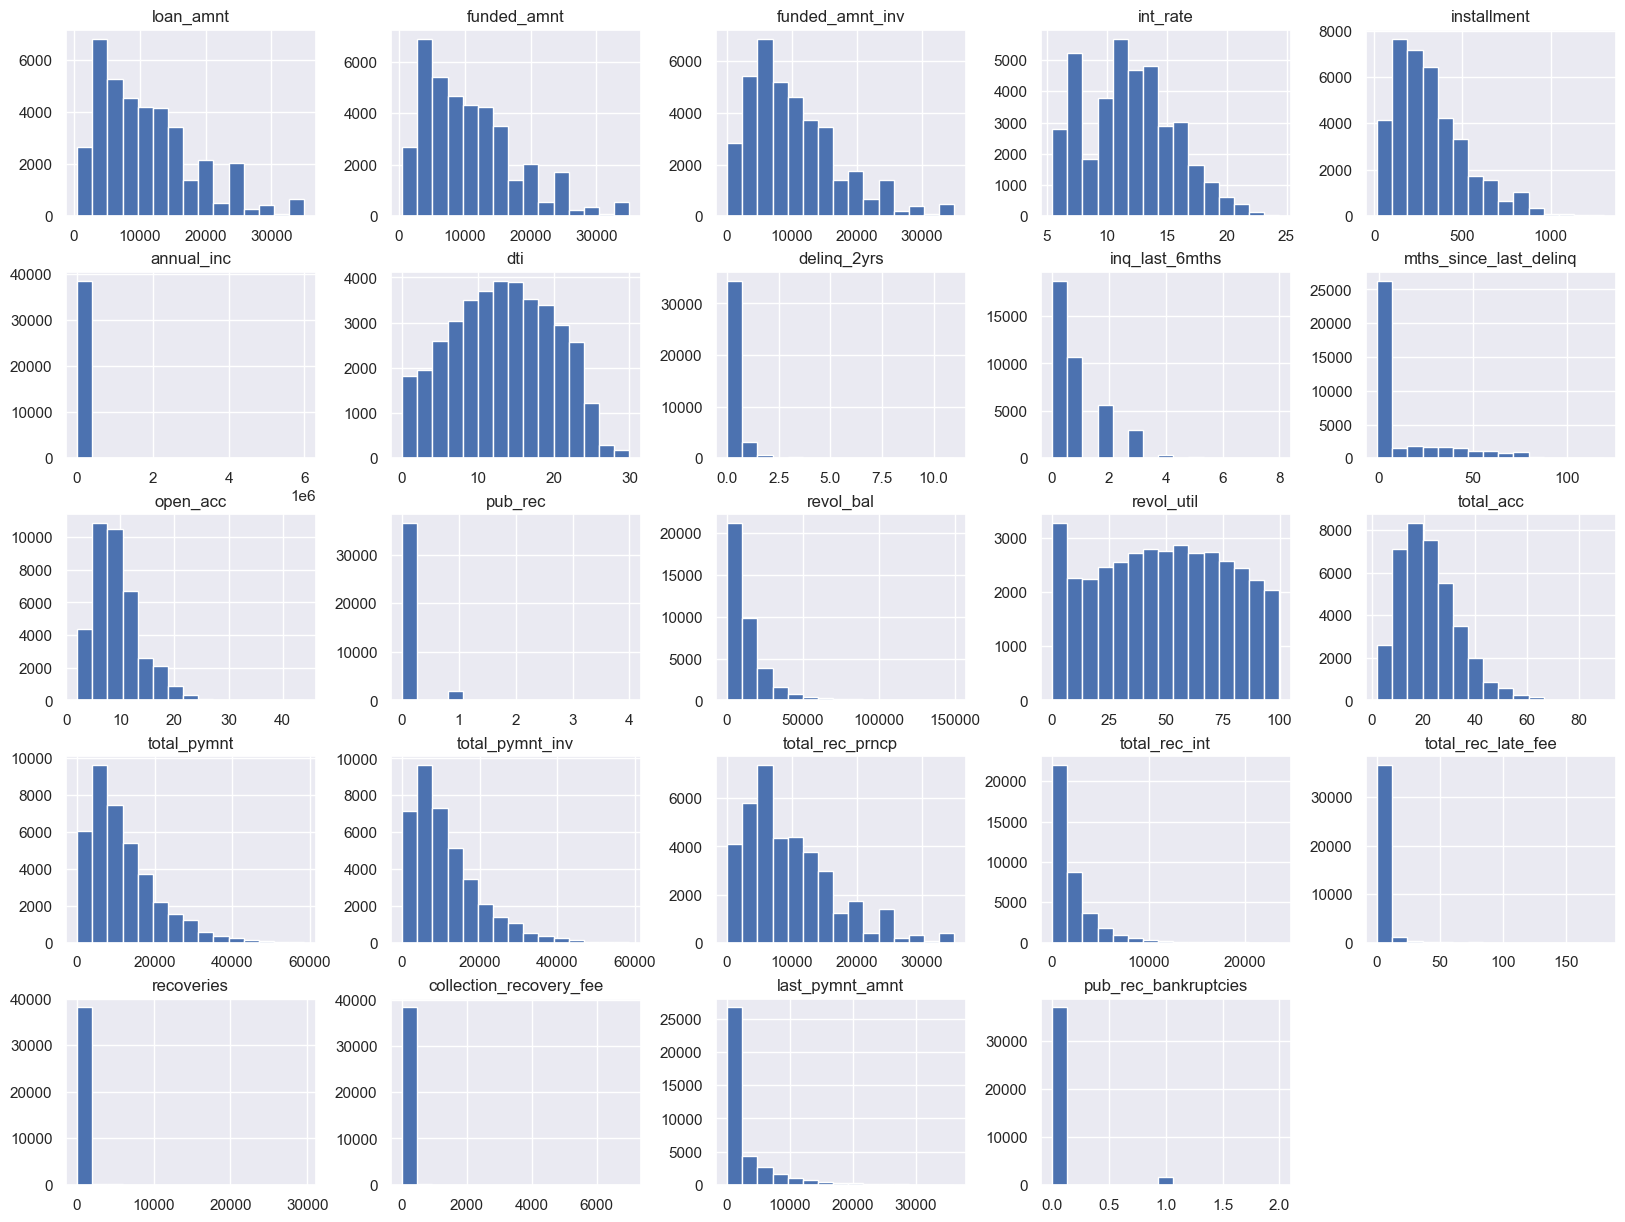

In [1294]:
df.hist(bins=15, figsize=(20, 15))

## 2. Derived Metrics

### 2.1. Business driven

In [1295]:
df.head()

,,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
id,member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,No information,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.650,0,Jan-85,1,-1.000,3,0,13648,83.700,9,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,May-16,0.000
1077430,1314167,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,GA,1.000,0,Apr-99,5,-1.000,3,0,1687,9.400,4,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,Sep-13,0.000
1077175,1313524,2400,2400,2400.000,36 months,15.960,84.330,C,C5,No information,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,small_business,IL,8.720,0,Nov-01,2,-1.000,2,0,2956,98.500,10,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,May-16,0.000
1076863,1277178,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,other,CA,20.000,0,Feb-96,1,35.000,10,0,5598,21.000,37,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,Apr-16,0.000
1075269,1311441,5000,5000,5000.000,36 months,7.900,156.460,A,A4,Veolia Transportaton,3 years,RENT,36000.000,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.200,0,Nov-04,3,-1.000,9,0,7963,28.300,12,5632.210,5632.210,5000.000,632.210,0.000,0.000,0.000,Jan-15,161.030,Jan-16,0.000


We need a column contains the ***actual tenor (the actual length of the loan not the 'term')***. However, there are *no date columns contains year information* so that it is really hard to find the exact tenor of the loans. If the dates columns has year information, the *tenor columns could be extract from calculating the time from the issue date to the end date of the loan*. However, there are no column has the end date information so that tenor in this case could be calculated from issued date and last payment date.

### 2.2. Type driven

Because column 'annual_inc' is skewed to the left, so there is in need of binning the columns to better understand the values.

<Axes: ylabel='Frequency'>

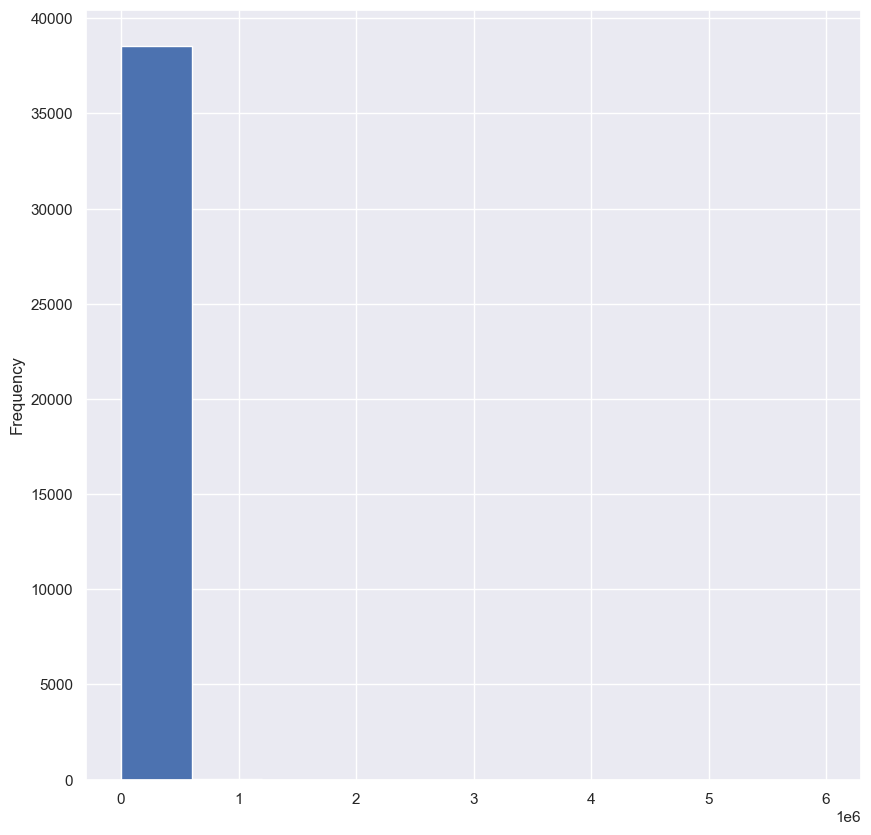

In [1296]:
df['annual_inc'].plot.hist()

In [1297]:
# binning annual_inc
conditions = [(df['annual_inc'] <= 5*1e4),
              (df['annual_inc'] <= 1*1e5),
              (df['annual_inc'] <= 5*1e5),
              (df['annual_inc'] > 5*1e5)
              ]
bins = ['<=50k', '50k-100k', '100k-1mil', '>1mil']
df['annual_inc_bins'] = np.select(conditions, bins)

In [1298]:
df['annual_inc_bins'].unique()


array(['<=50k', '50k-100k', '100k-1mil', '>1mil'], dtype=object)

<Axes: >

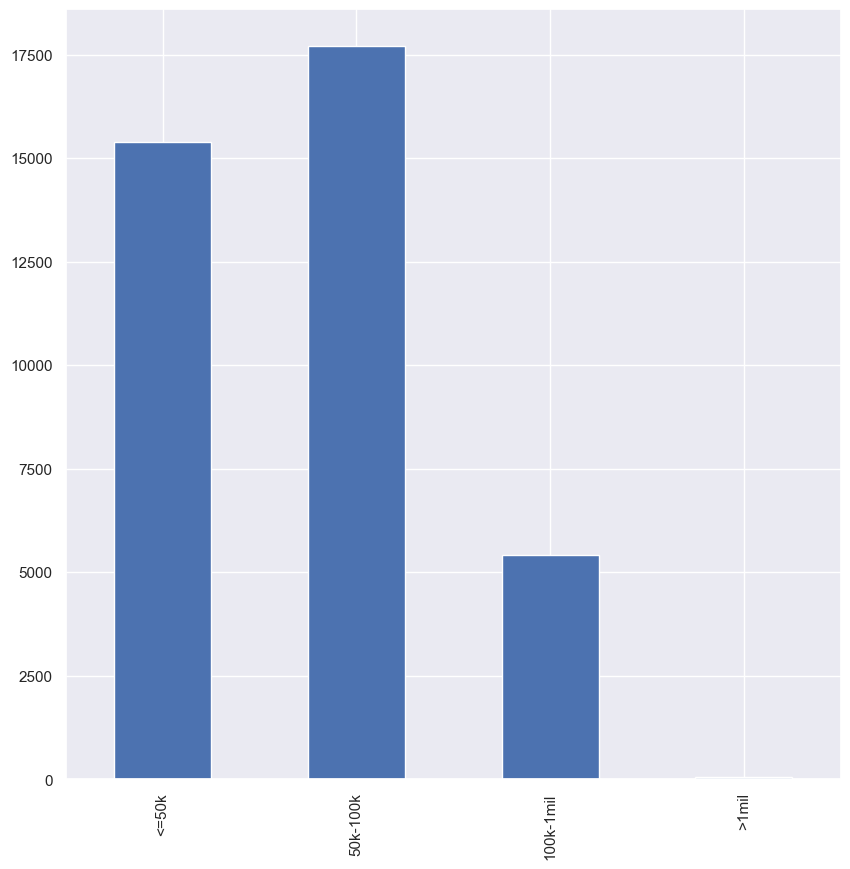

In [1299]:
df['annual_inc_bins'].value_counts().reindex(['<=50k', '50k-100k', '100k-1mil', '>1mil']).plot.bar()

### 2.3. Data driven

For performing machine learning model, we need a columns contains boolean values of the label.

In [1300]:
# create a loan_default_flag column
df['label'] = np.where(df['loan_status'] == 'Charged Off', 1,0)

## 3. Bivariate Analysis

#### Loan amount - Funded amount - Funded amount by investors
Next, we will examine the series column of the loan amount: **'loan_amnt', 'funded_amnt', 'funded_amnt_inv'**. The ***loan amount*** is the applied amount from applicants, ***funded amount*** is the amount commited to the loan and ***funded amount investor*** is commited amount from investors, this is also the chronological order. First, let's see the distributions of these columns:

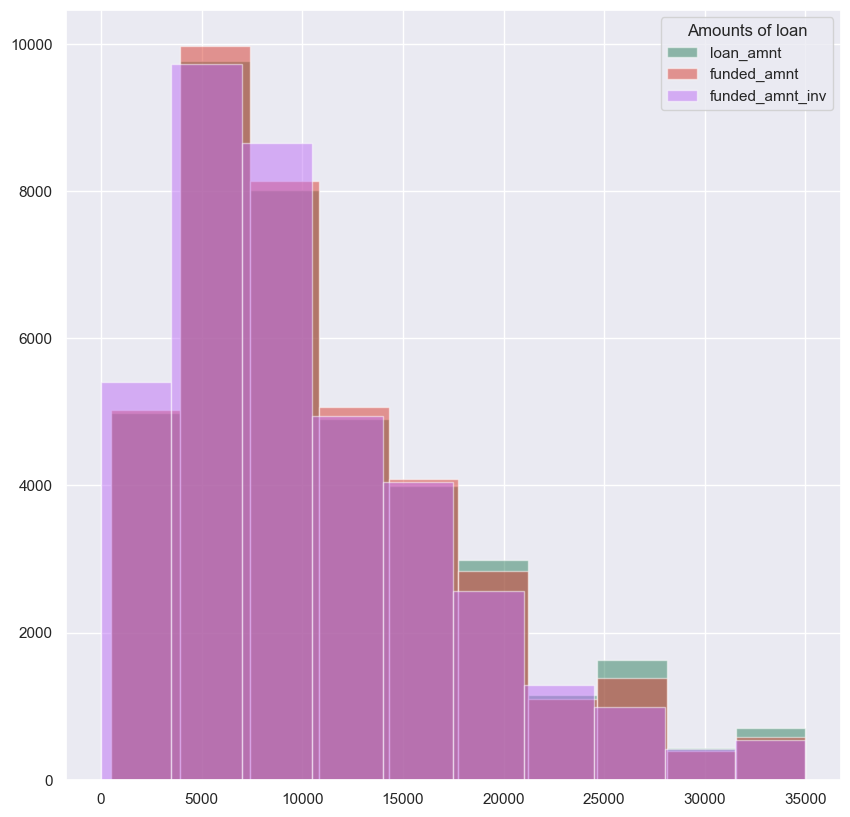

In [1301]:
#define int_rate values by loan_status group
loan_amnt = df['loan_amnt']
funded_amnt = df['funded_amnt']
funded_amnt_inv = df['funded_amnt_inv']

#add two histograms to one plot
plt.hist(loan_amnt, alpha=0.5, label='loan_amnt', color = '#2d7f5e')
plt.hist(funded_amnt, alpha=0.5, label='funded_amnt', color = '#D83A2D')
plt.hist(funded_amnt_inv, alpha=0.5, label='funded_amnt_inv', color = '#BD6EF5')

plt.legend(title='Amounts of loan')
plt.show()

Three types of loan amount have similar distributions.

The dataset is aligned with business sense as funded amount always smaller han or equal to Loan amount, with a lot of times that loan amount is equal to funded amount.

<Axes: xlabel='funded_amnt', ylabel='loan_amnt'>

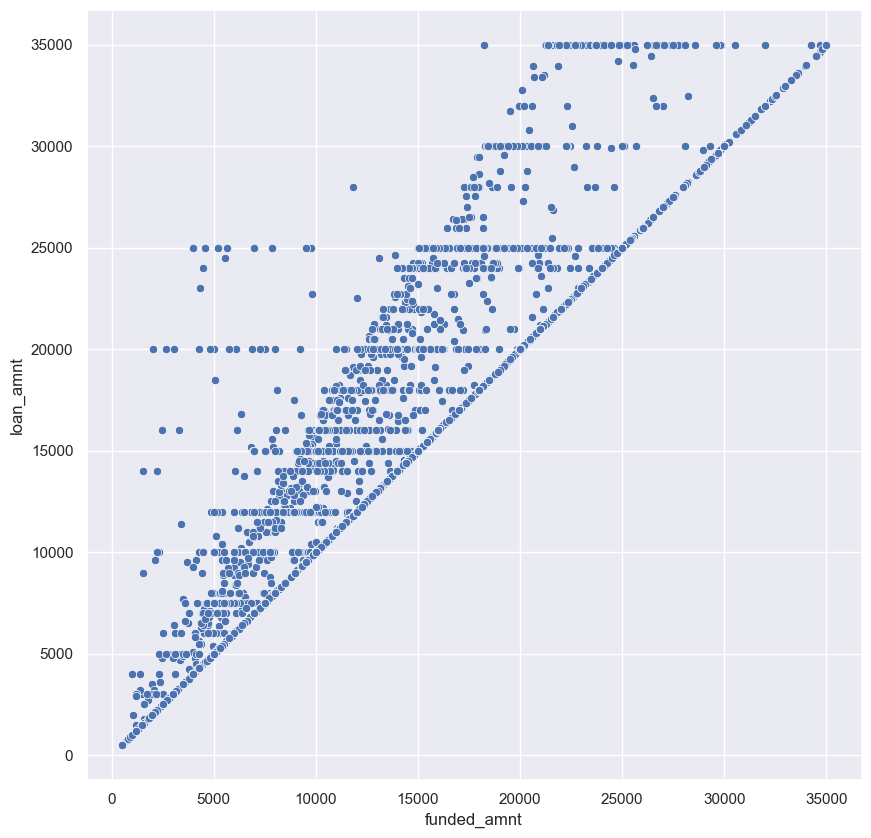

In [1302]:
sns.scatterplot(data = df, x = 'funded_amnt', y = 'loan_amnt')

The case is similar for the comparison between 'funded_amnt' and 'funded_amnt_inv'.

<Axes: xlabel='funded_amnt_inv', ylabel='funded_amnt'>

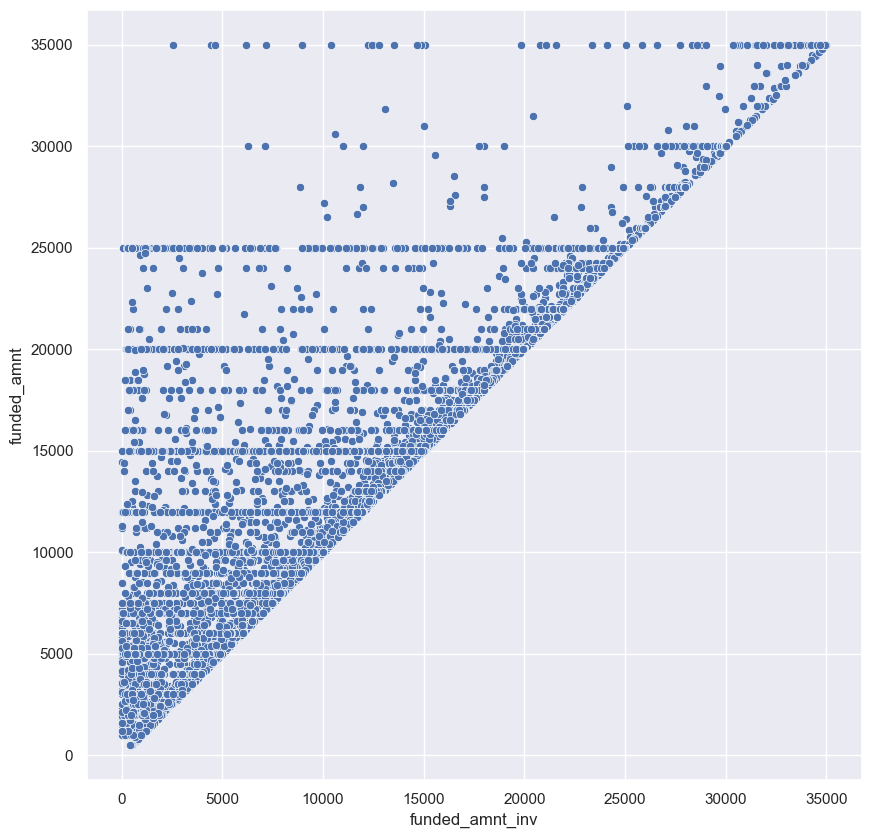

In [1303]:
sns.scatterplot(data = df, x = 'funded_amnt_inv', y = 'funded_amnt')

#### Term and Home Ownership

For 36 months term, borrowers have *Rent* is the most popular while for 60 months term, *Mortgage* is the most popular

In [1304]:
pd.crosstab(df['term'],df['home_ownership'])

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
term,,,,,
36 months,12003,3,97,2301,14692
60 months,5018,0,1,674,3788


#### Grade and Home Ownership
Borrowers have *Mortgage* has better grade than *Rent* as borrowers have *Rent* type of home has a lot of loan in lower grade like B,C,D,E.

In [1305]:
pd.crosstab(df['grade'],df['home_ownership'])

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
grade,,,,,
A,5136,1,24,863,4021
B,5003,2,32,902,5736
C,3136,0,16,579,4103
D,1957,0,17,363,2748
E,1175,0,7,186,1295
F,470,0,2,61,443
G,144,0,0,21,134


However, borrowers have *Mortgage* and *Rent* have a lot of laon in *debt consolidation* purpose. 

In [1306]:
pd.crosstab(df['purpose'],df['home_ownership'])

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
purpose,,,,,
car,732,0,2,149,616
credit_card,2209,0,11,288,2519
debt_consolidation,7467,1,40,1274,9273
educational,90,0,3,20,212
home_improvement,2289,0,5,322,259
house,136,0,1,32,198
major_purchase,920,0,7,232,991
medical,295,0,3,65,318
moving,108,0,1,27,440


# Part III: Suggestions and Recommendations

### Further data preprocessing for Machine Learning models could be:

#### Standard Scaler (for numeric variables)

Using Standard Scaler to reduce bias in dataset when clustering.

In [1307]:
num_cols = df.select_dtypes(['float64', 'int64']).columns
num_cols

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'label'], dtype='object')

In [1308]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = df.copy()
scaled_df[num_cols] = scaler.fit_transform(scaled_df[num_cols])

The final results after Scaling:

In [1309]:
scaled_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,label
count,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000
mean,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.435,-1.450,-1.456,-1.764,-1.470,-1.009,-1.989,-0.298,-0.814,-0.595,-1.653,-0.233,-0.838,-1.713,-1.755,-1.347,-1.295,-1.377,-0.887,-0.187,-0.140,-0.085,-0.611,-0.211,-0.413
25%,-0.782,-0.788,-0.744,-0.811,-0.751,-0.448,-0.771,-0.298,-0.814,-0.595,-0.744,-0.233,-0.608,-0.829,-0.792,-0.721,-0.719,-0.734,-0.617,-0.187,-0.140,-0.085,-0.563,-0.211,-0.413
50%,-0.197,-0.174,-0.212,-0.060,-0.214,-0.154,0.015,-0.298,0.120,-0.595,-0.063,-0.233,-0.285,0.013,-0.180,-0.249,-0.253,-0.235,-0.343,-0.187,-0.140,-0.085,-0.485,-0.211,-0.413
75%,0.538,0.595,0.538,0.663,0.494,0.206,0.792,-0.298,0.120,0.406,0.619,-0.233,0.228,0.830,0.608,0.485,0.466,0.503,0.231,-0.187,-0.140,-0.085,0.156,-0.211,-0.413
max,3.260,3.415,3.528,3.378,4.710,92.361,2.505,22.048,6.652,4.910,7.889,16.588,8.590,1.805,5.947,5.301,5.435,3.617,8.975,24.445,42.261,46.338,7.424,9.651,2.420


#### One hot encoding (for categorical variables)

For demo, the column 'term' will be used to perform one-hot-encoding.

In [1310]:
df['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [1311]:
# demo of column 'term'
df_encoded = scaled_df.copy()
df_encoded['term_36months'] = np.where(df['term'] == '36 months', 1,0)
df_encoded['term_60months'] = np.where(df['term'] == '60 months', 1,0)

So that, after encoding, column 'term' will be demonstrated through 2 columns 'term_36months' and 'term_60months'. It is not necessary to encode every unique values in column but some key values that is important to the label only.

In [1312]:
df_encoded['term_36months'].unique()

array([1, 0])

#### Principal Components Analysis


For demo, we will take the current numeric columns only to perform PCA.

In [1313]:
df_pca = df_encoded.copy()
df_pca = df_pca[df_pca.select_dtypes(['float64', 'int64']).columns]

In [1314]:
df_pca.dtypes

loan_amnt                  float64
funded_amnt                float64
funded_amnt_inv            float64
int_rate                   float64
installment                float64
annual_inc                 float64
dti                        float64
delinq_2yrs                float64
inq_last_6mths             float64
mths_since_last_delinq     float64
open_acc                   float64
pub_rec                    float64
revol_bal                  float64
revol_util                 float64
total_acc                  float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
pub_rec_bankruptcies       float64
label                      float64
term_36months                int64
term_60months                int64
dtype: object

In [1315]:
from sklearn.decomposition import PCA
pca = PCA()
reduced_features = pca.fit_transform(df_pca)

After performing PCA, here is the dimensions of the dataset:

In [1316]:
reduced_features.shape

(38577, 27)

And the details values of the dataset after PCA:

In [1317]:
reduced_features

array([[-2.23000073e+00,  2.00914659e-01, -4.27860481e-01, ...,
         8.75890014e-03, -4.07268949e-07, -2.91704499e-15],
       [-3.59046983e+00,  1.28451865e+00, -1.39209847e+00, ...,
        -5.34181964e-02,  3.79216892e-10,  2.40816141e-13],
       [-3.09309958e+00,  5.39111882e-01, -1.59287758e+00, ...,
         2.42468631e-02, -2.65783790e-07,  2.41945026e-15],
       ...,
       [-2.67560978e+00, -1.18280133e+00,  3.41918154e-01, ...,
         7.69703638e-03,  1.11394143e-07,  6.07464908e-17],
       [-1.79818148e+00, -1.20238093e+00,  3.19196479e+00, ...,
         1.48920636e-02, -1.00675053e-07,  5.99674315e-17],
       [-1.94636953e+00,  1.37312668e-02, -9.42338173e-01, ...,
        -4.96672463e-02,  3.15125283e-07,  8.69986124e-17]])

### For suggestions for business on data quality:
There are issues of missing values and some business-related columns need to be added to better understanding the loan records.